# DBSCAN

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
np.random.seed(42)

In [84]:
df=pd.read_csv('df_behaviour.csv',delimiter=',')
df.head()

,customer_id,0,1,2,3,4
0,5d272b9dcb,0.137368,0.000000,0.596236,0.801604,0.180086
1,f6d1b2ba63,0.216043,0.020715,0.303097,0.871193,0.191494
2,180c632ed8,0.142785,0.006192,0.599059,0.797506,0.263937
3,6aef2b6726,0.141288,0.006068,0.601937,0.806123,0.189800
4,8475ee66ef,0.141747,0.005733,0.600668,0.804385,0.175570


In [85]:
df.set_index('customer_id', inplace = True)

In [86]:
metric_features=df.columns
metric_features

Index(['0', '1', '2', '3', '4'], dtype='object')

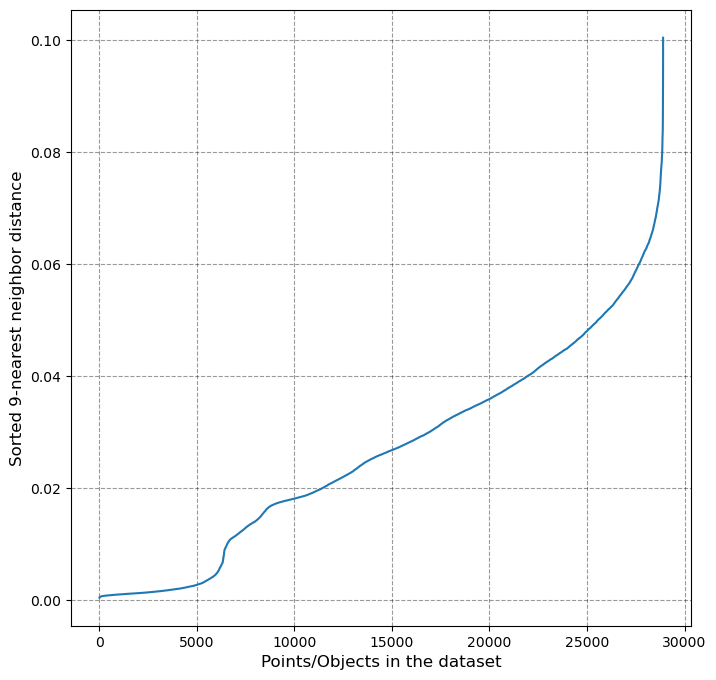

In [87]:
from sklearn.neighbors import NearestNeighbors
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * df.shape[-1] - 1  # k=2*{dim(dataset)} - 1
get_kdist_plot(X=df[metric_features], k= k)

In [88]:
from sklearn.cluster import DBSCAN
epsilon = 0.04
min_samples = 30
n_jobs = 5 
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)


In [89]:
clusters = dbscan.fit_predict(df[metric_features])
df['Cluster'] = clusters
df['Cluster'].value_counts()

Cluster
 0    14150
-1    11892
 1     1943
 2      550
 3      160
 7       80
 5       51
 4       45
 6       32
Name: count, dtype: int64

In [90]:
df = df[df['Cluster'] != -1].reset_index(drop=True)
df=df.drop('Cluster',axis=1)

# Psycograpfic

In [91]:
df_psy=pd.read_csv('df_psy.csv',delimiter=',')
df_psy.head()

,customer_id,0,1,2,3,4,5,6,7,8,9
0,1b8f824d5e,0.034845,0.290847,0.418229,0.386820,0.151880,0.454095,0.410637,0.428278,0.188199,0.063374
1,5d272b9dcb,0.065898,0.315260,0.418412,0.390004,0.135756,0.425134,0.348124,0.471136,0.192270,0.058354
2,f6d1b2ba63,0.051935,0.308049,0.421689,0.392993,0.137495,0.426323,0.348143,0.471266,0.192670,0.059125
3,180c632ed8,0.053675,0.284766,0.409236,0.377438,0.149787,0.446199,0.387929,0.445772,0.189182,0.060872
4,4eb37a6705,0.113429,0.309829,0.395542,0.365469,0.137612,0.427003,0.349883,0.472594,0.190322,0.055414


In [92]:
df_psy.set_index('customer_id', inplace = True)

In [93]:
metric_features_psy = df_psy.columns

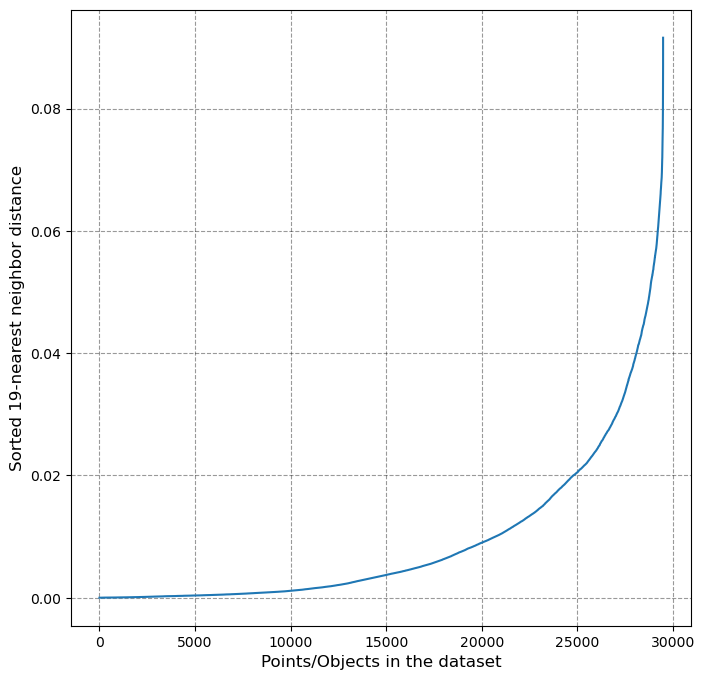

In [94]:
from sklearn.neighbors import NearestNeighbors
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * df_psy.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=df_psy, k=k)

In [95]:
from sklearn.cluster import DBSCAN
epsilon = 0.05
min_samples = 30
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)


In [96]:
clusters_psy = dbscan.fit_predict(df_psy)
df_psy['Cluster'] = clusters_psy
df_psy['Cluster'].value_counts()

Cluster
 0    29403
-1       86
Name: count, dtype: int64

In [97]:
df_psy = df_psy[df_psy['Cluster'] != -1].reset_index(drop=True)
df_psy=df_psy.drop('Cluster',axis=1)

# Demo

In [98]:
df_demo = pd.read_csv('df_demo.csv',delimiter=',')
df_demo.head()

,customer_id,customer_age
0,1b8f824d5e,0.046154
1,5d272b9dcb,0.030769
2,f6d1b2ba63,0.353846
3,180c632ed8,0.169231
4,4eb37a6705,0.076923


In [105]:
df_demo.set_index('customer_id', inplace = True)

KeyError: "None of ['customer_id'] are in the columns"

In [100]:
metric_features_demo = df_demo.columns

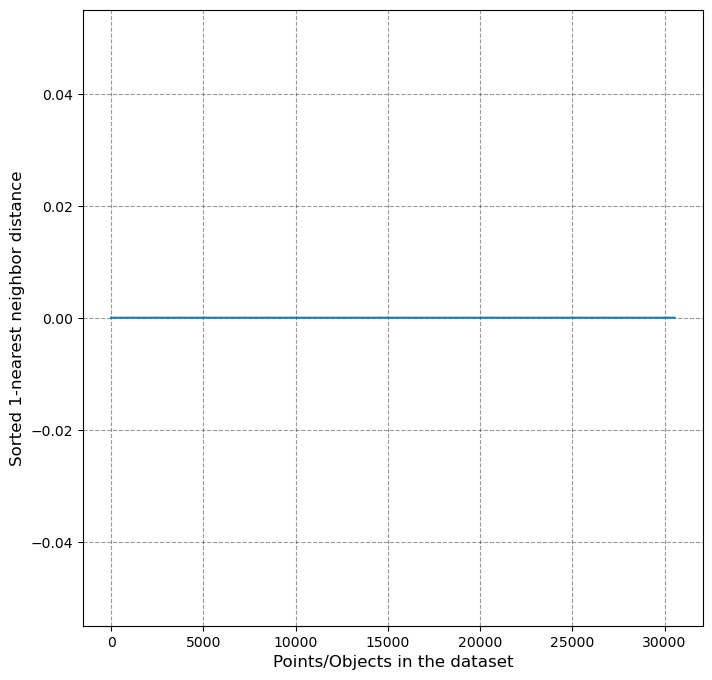

In [101]:
from sklearn.neighbors import NearestNeighbors
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * df_demo.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=df_demo, k=k)

In [102]:
from sklearn.cluster import DBSCAN
epsilon = 0.05
min_samples = 20
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

In [106]:
clusters_demo = dbscan.fit_predict(df_demo)
df_psy = df_psy.loc[df_demo.index] 
df_psy['Cluster'] = clusters_demo
print(df_psy['Cluster'].value_counts())

KeyError: "None of [Index(['1b8f824d5e', '5d272b9dcb', 'f6d1b2ba63', '180c632ed8', '4eb37a6705',\n       '6aef2b6726', '8475ee66ef', 'f2f53bcc67', '5b650c89cc', '84775a7237',\n       ...\n       'eeb690ec24', 'eeee76a25f', 'f1ab8a54c4', 'f22aa9dea5', 'f2d4790b5b',\n       'f4e366c281', 'f6b6709018', 'f74ad8ce3f', 'f7b19c0241', 'fd40d3b0e0'],\n      dtype='object', name='customer_id', length=30554)] are in the [index]"

In [ ]:
df_psy = df_demo[df_demo['Cluster'] != -1].reset_index(drop=True)
df_demo=df_demo.drop('Cluster',axis=1)